In [1]:
!pip3 install numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

<bound method NDFrame.head of            x         y
0   1.658985  4.285136
1  -3.453687  3.424321
2   4.838138  1.151539
3  -5.379713 -3.362104
4   0.972564  2.924086
..       ...       ...
75 -2.793241 -2.149706
76  2.884105  3.043438
77 -2.967647  2.848696
78  4.479332 -1.764772
79 -4.905566 -2.911070

[80 rows x 2 columns]>


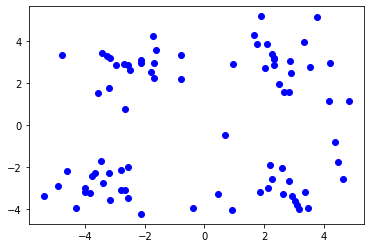

In [80]:
df = pd.read_csv("data.csv")
print(df.head)

x = df.to_numpy()
plt.scatter(x[:,0], x[:,1], color='b')
plt.show()

In [85]:
class KMeans():
  def __init__(self, n_clusters, data):
    self.k = n_clusters
    self.x = data
    self.d = self.x[0].shape[0] # Dimension
    
    # Initializing K centroids within the data bounds
    # Respecting the diffirent max and min of the X and Y axis
self.d = self.x[0].shape[0]
self.centroids = np.zeros((self.k, self.d))
for i in range(0, self.d):
    print(self.centroids[i])
    self.centroids[i] = np.random.uniform(low=np.min(self.x[:, i]), high=np.max(self.x[:, i]), size=(1, self.d))
    
    self.labels = self.genLabels()
    
    self.colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'purple', 5:'orange', 6:'brown'}
    
  def dist(self, p, q):
    # Euclidian distance
    return math.sqrt(np.sum(np.power(np.subtract(p, q), 2)))

  def predict(self, p):
    return np.argmin([self.dist(p, centroid) for centroid in self.centroids])
    
  def genLabels(self):
    return np.asarray([self.predict(p) for p in self.x])

  def fit(self, epochs, step):
    print(f"\nFitting for {epochs} epochs with step of {step}")
    for epoch in range(0, epochs):
      for i, centroid in enumerate(self.centroids):

        # VECTORS!!
        l = [1 if item == i else 0 for item in self.labels]
        temp = np.matmul(np.transpose(np.subtract(x, centroid)), np.transpose(l))
        self.centroids[i] += np.matmul([step], np.divide(temp.reshape(1,2), sum(l)))

        # Regenerate the labels
        self.labels = self.genLabels()
    
    print("Done fitting!\n")

  def showPlot(self, classification=False):
    plt.figure(1, figsize = (10,10))
    
    if classification:
      for i, p in enumerate(self.x):
       plt.scatter(p[0], p[1], color=self.colors[self.labels[i]])
      
      for i, centroid in enumerate(self.centroids):
        plt.scatter(centroid[0], centroid[1], color=self.colors[i], s=100, marker="x")

    else:
      plt.scatter(self.x[:,0], self.x[:,1], color='blue')

      plt.scatter(self.centroids[:,0], self.centroids[:,1], color="red", s=100)

    plt.show()
    
  def printCentroids(self):
    print("="*20)
    print("Centroids:")
    print(self.centroids)


[0. 0.]
[0. 0.]


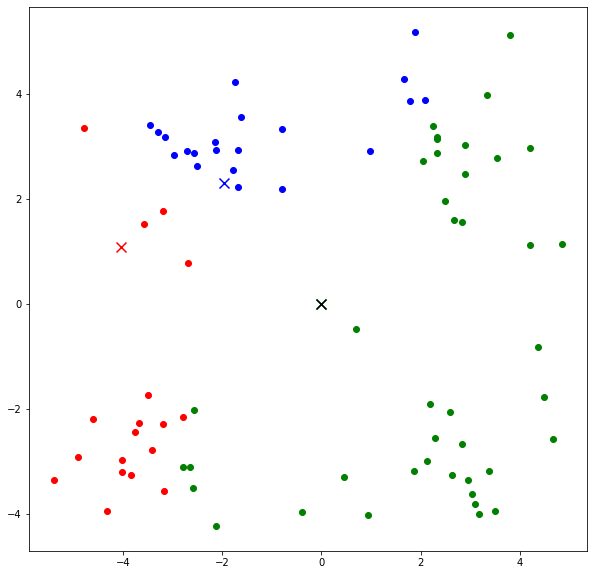

Centroids:
[[-4.04213827  1.0942877 ]
 [-1.96400661  2.30331859]
 [ 0.          0.        ]
 [ 0.          0.        ]]

Fitting for 100 epochs with step of 0.1
Done fitting!

Centroids:
[[-3.82074599 -1.75451589]
 [-1.26728432  3.25989964]
 [ 2.12425692 -0.73726344]
 [        nan         nan]]


/home/mathis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


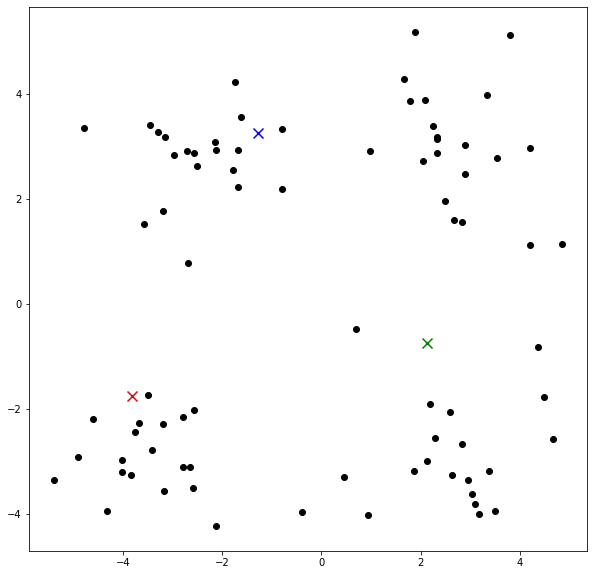

KMean prediction for [-2, 3] is 3 which is black


In [86]:
kmeans = KMeans(n_clusters=4, data=x)
kmeans.showPlot(classification=True)
kmeans.printCentroids()
kmeans.fit(epochs=100, step=0.1)
kmeans.printCentroids()
kmeans.showPlot(classification=True)
pred = kmeans.predict([-2, 3])
print(f"KMean prediction for [-2, 3] is {pred} which is {kmeans.colors[pred]}")